# This notebook compiled from
https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504

In [2]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import librosa
import librosa.display



In [3]:
data_path = '/Users/johnlennon/Downloads/Yandex'
train_path = '/Users/johnlennon/Downloads/Yandex/train'
test_path = '/Users/johnlennon/Downloads/Yandex/test'
train_dir = '/Users/johnlennon/Downloads/Yandex/train'
train_csv = '/Users/johnlennon/Downloads/Yandex/train/targets.tsv'
train_file0 = '/Users/johnlennon/Downloads/Yandex/train/0a0b16288ff78515d6c091cfeb813bad.wav'
train_file1 = '/Users/johnlennon/Downloads/Yandex/train/0a1f7e9733c1896cef712f25a3518bcf.wav'

## lets some practice with the audio and libros

In [3]:
# Listen
from IPython.display import Audio
Audio(train_file0)

In [148]:
Audio(train_file1)

In [4]:
# non librosa!
# bitrate with amplitude example
# it show the amplitude in bitrate score in time array

from scipy.io import wavfile
sample_rate, samples = wavfile.read(train_file0)

print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[20000:20010])


Example shape  (41984,) Sample rate  16000 Data type <class 'numpy.ndarray'>
[-4598 -4558 -4362 -4070 -1394  1671  2382  2681  3613  4587]


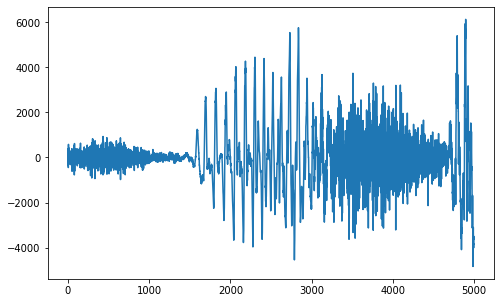

In [5]:
# non librosa!
# show the signal from 15000 to 2000(all signal is 41984) of amplitude
t = [i for i in range(5000)]
y = samples[15000:20000]
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(t, y)
plt.show()

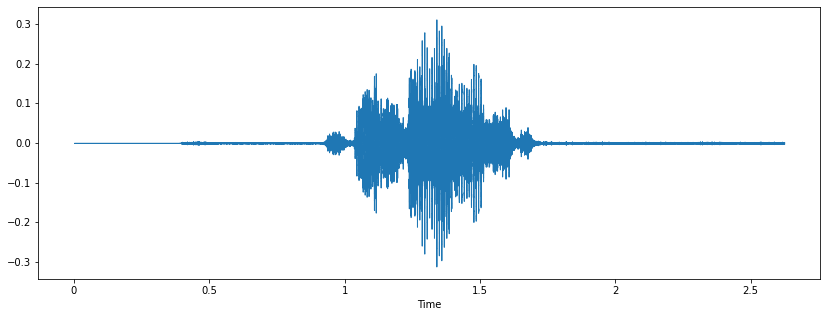

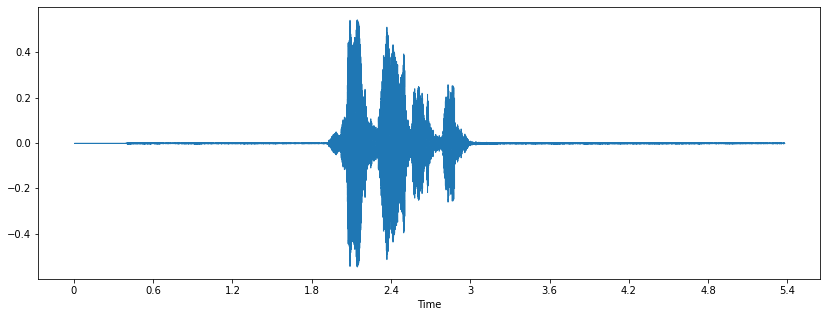

In [147]:
# 1
import librosa
# Load the audio file
samples, sample_rate = librosa.load(train_file0, sr=16000)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate)
samples, sample_rate = librosa.load(train_file1, sr=16000)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate)

In [33]:
len(samples)

41984

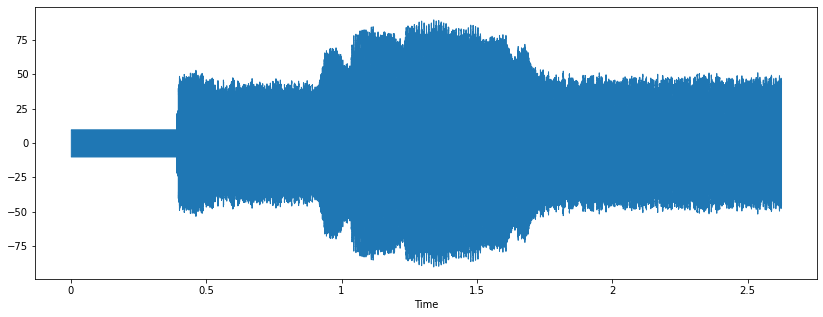

In [36]:
mel_sgram = librosa.amplitude_to_db(samples, ref=np.min)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(mel_sgram, sr=sample_rate)

53816 [-0.00738525 -0.00579834 -0.00299072 -0.003479   -0.00524902 -0.00961304
 -0.00064087 -0.01034546  0.00128174 -0.00274658 -0.00408936  0.00097656]
Fourie is of type <class 'numpy.ndarray'> with shape (1025, 169)
Fourie is of type <class 'numpy.ndarray'> with shape (1025, 29)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


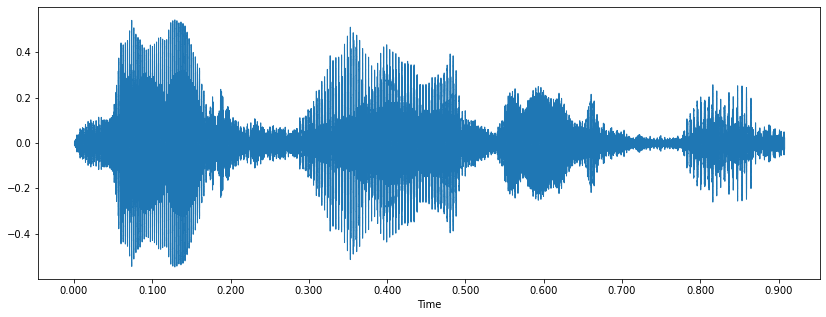

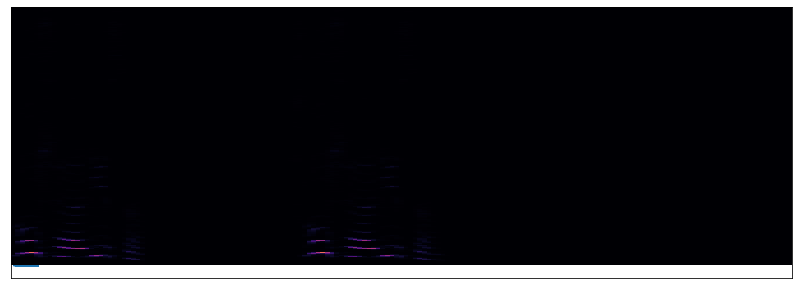

In [125]:
file_name = train_file1

samples, sample_rate = librosa.load(file_name, sr=16000)

temp = 0
# samples_left = array([])
n = 100
def cut_left(sample):
    for i10 in range(int(len(sample)/n)):
        temp = sample[0:n+1].sum()
        if temp<float(2/16):
            sample = np.delete(sample, np.s_[0:n], axis =0)
        else:
            return sample

def cut_right(sample):
    for i10 in range(int(len(sample)/n)):
        temp = sample[-(n+1)].sum()
        if temp<float(1/32):
            sample = np.delete(sample, np.s_[-n:], axis =0)
        else:
            return sample        

def all_cuts(sample):
    x = cut_left(sample)
    y = cut_right(x)
    return y

x = cut_left(samples)
y = cut_right(x)
print(len(x), x[0:12])
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=16000)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=16000)
# librosa
# make a Fourie spectrograme in signal duration
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)
print (f'Fourie is of type {type(sgram)} with shape {sgram.shape}')
sgramy = librosa.stft(y)
librosa.display.specshow(sgramy)
print (f'Fourie is of type {type(sgramy)} with shape {sgramy.shape}')


In [101]:
import soundfile as sf
sf.write('file_trim_5s.wav', y, 16000)

# Listen
from IPython.display import Audio
Audio('file_trim_5s.wav')


In [102]:
Audio(file_name)

In [63]:
samples[-10:]

array([0.00167847, 0.00152588, 0.00137329, 0.0010376 , 0.00112915,
       0.00146484, 0.0015564 , 0.00183105, 0.00186157, 0.00167847],
      dtype=float32)

Fourie is of type <class 'numpy.ndarray'> with shape (1025, 83)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


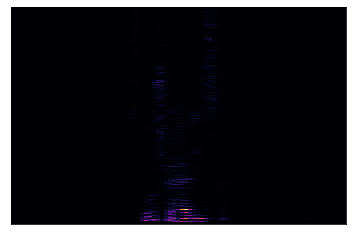

In [6]:
# librosa
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file0, sr=None)
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)
print (f'Fourie is of type {type(sgram)} with shape {sgram.shape}')

Mel is of type <class 'numpy.ndarray'> with shape (1025, 83)


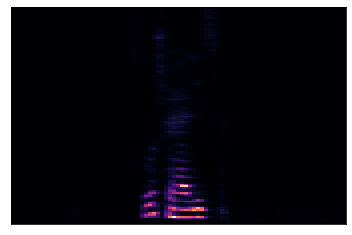

In [7]:
# use the mel-scale instead of raw frequency

sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)
print (f'Mel is of type {type(sgram_mag)} with shape {sgram_mag.shape}')

Mel is of type <class 'numpy.ndarray'> with shape (1025, 169)


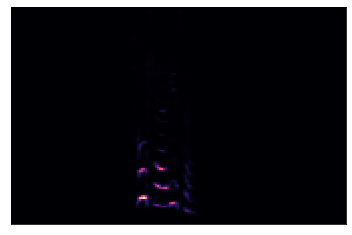

In [11]:
# for woman
# use the mel-scale instead of raw frequency
samples, sample_rate = librosa.load(train_file1, sr=None)
sgram = librosa.stft(samples)
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)
print (f'Mel is of type {type(sgram_mag)} with shape {sgram_mag.shape}')

Mel in Db is of type <class 'numpy.ndarray'> with shape (128, 83)


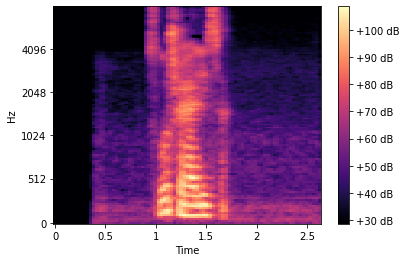

In [8]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
print (f'Mel in Db is of type {type(mel_sgram)} with shape {mel_sgram.shape}')

Mel in Db is of type <class 'numpy.ndarray'> with shape (128, 169)


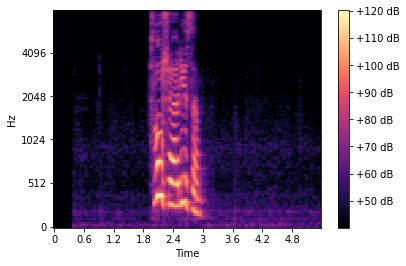

In [12]:
# for woman
# use the mel-scale instead of raw frequency
samples, sample_rate = librosa.load(train_file1, sr=None)
sgram = librosa.stft(samples)
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
print (f'Mel in Db is of type {type(mel_sgram)} with shape {mel_sgram.shape}')


MFCC is of type <class 'numpy.ndarray'> with shape (20, 83)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_9588/1066980303.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00183105 0.00186157 0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


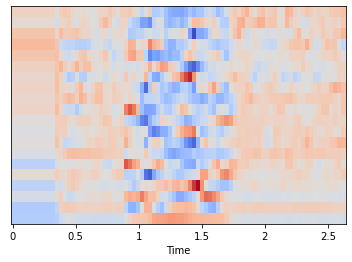

In [9]:
# try mfcc and downgrade number of hiperparametres


import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(train_file0, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type with shape (20, 83)
# sgram.shape has beine (1025, 83)
# mel_sgram has beine (128, 83)

# Lets begin

In [5]:
# ----------------------------
# Prepare training data from Metadata file
# ----------------------------
import pandas as pd
from pathlib import Path

download_csv_path = '/Users/johnlennon/Downloads/Yandex'

# Read metadata file
metadata_file = f'{download_csv_path}/targets.tsv'
df = pd.read_csv(metadata_file, names=['name', 'classID'],  
                 thousands=',', 
                 sep='\t')
df.head()

# Construct file path by concatenating fold and file name
df['relative_path'] = df['name'].astype(str) + '.' + 'wav'

# # Take relevant columns
df = df[['relative_path', 'classID']]
print(f'Shape of df {df.shape}','\n', df.head())

Shape of df (13936, 2) 
                           relative_path  classID
0  5d1f7e43366513a1d0a6ec5640c3dc24.wav        1
1  9a701a4536a05b6610a590a9fe702ed8.wav        1
2  cad0b8547008d1524c1a0e5fd51f9908.wav        1
3  4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav        0
4  30fb32cba90b34af26f3f14f5d636805.wav        0


In [209]:
import plotly.express as px
df2 = px.data.tips()
fig = px.histogram(df2, x="total_bill", nbins=20)
fig.show()

(257, 414) vs (257, 96) in sr 16000


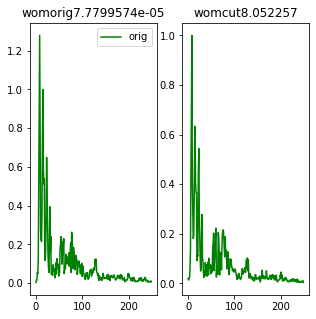

(257, 841) vs (257, 80) in sr 16000


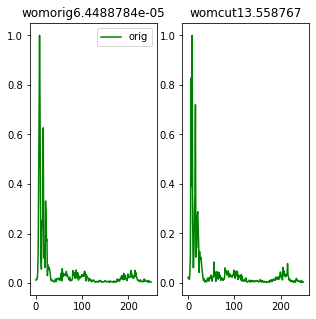

(257, 489) vs (257, 118) in sr 16000


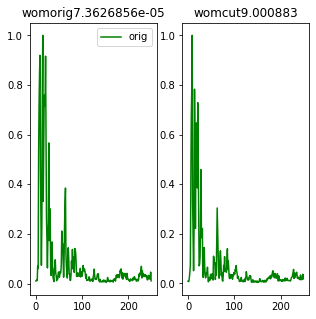

(257, 310) vs (257, 79) in sr 16000


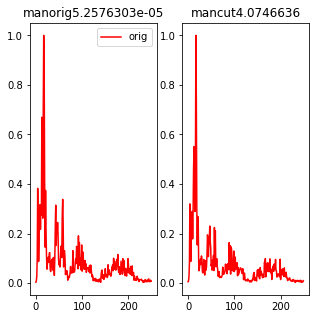

(257, 843) vs (257, 63) in sr 16000


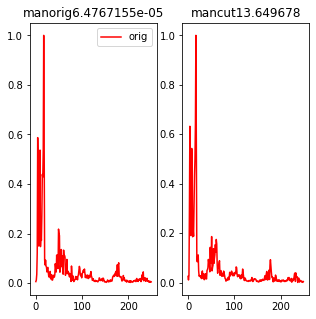

(257, 697) vs (257, 249) in sr 16000


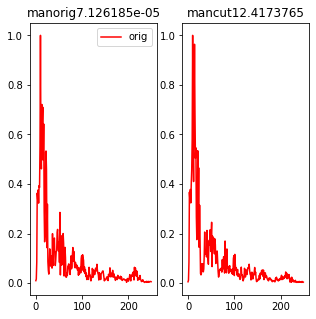

(257, 817) vs (257, 88) in sr 16000


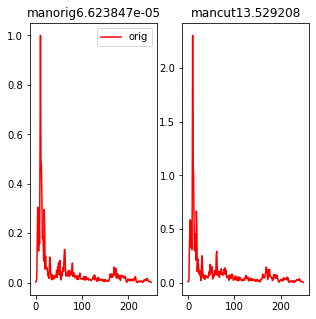

(257, 771) vs (257, 66) in sr 16000


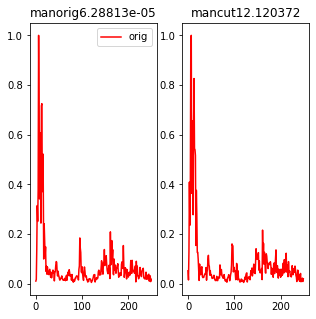

(257, 926) vs (257, 73) in sr 16000


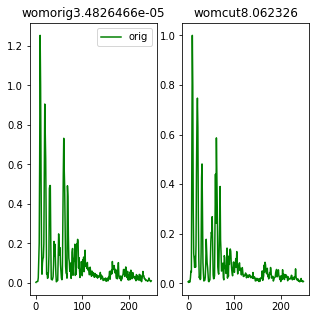

(257, 705) vs (257, 321) in sr 16000


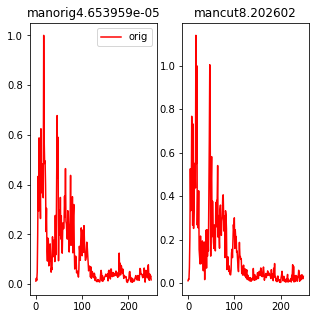

(257, 243) vs (257, 70) in sr 16000


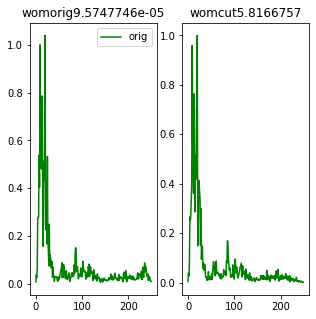

(257, 747) vs (257, 97) in sr 16000


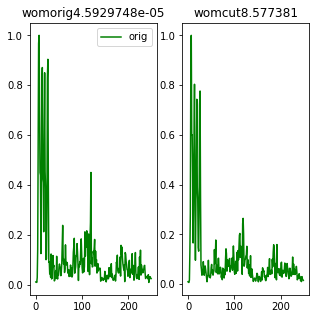

(257, 833) vs (257, 129) in sr 16000


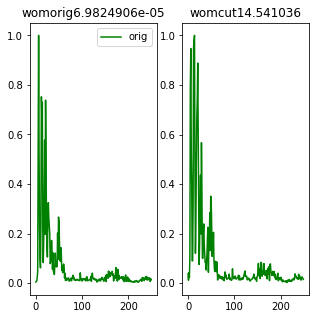

(257, 467) vs (257, 104) in sr 16000


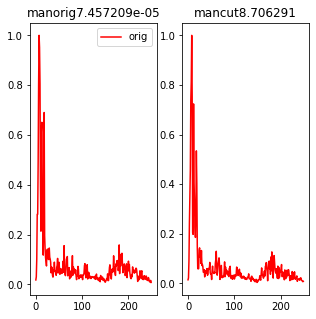

(257, 942) vs (257, 497) in sr 16000


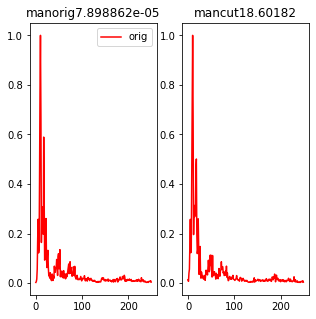

(257, 502) vs (257, 164) in sr 16000


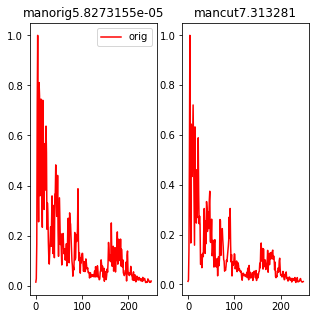

(257, 841) vs (257, 118) in sr 16000


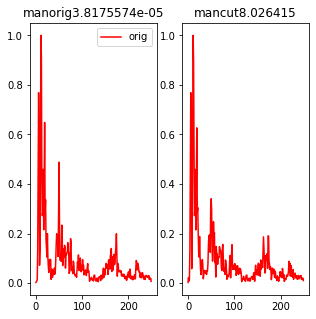

(257, 806) vs (257, 83) in sr 16000


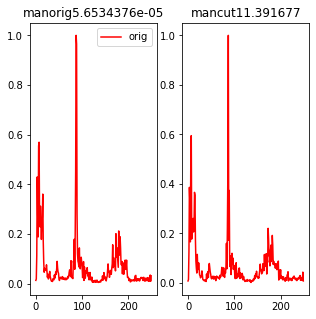

(257, 425) vs (257, 76) in sr 16000


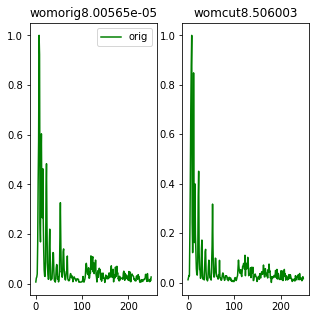

(257, 683) vs (257, 77) in sr 16000


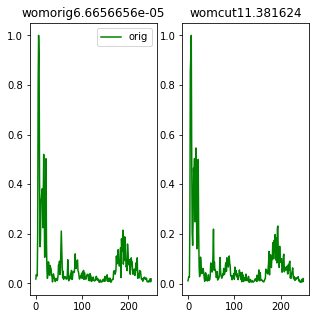

(257, 902) vs (257, 415) in sr 16000


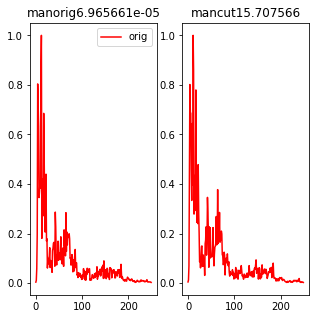

(257, 785) vs (257, 132) in sr 16000


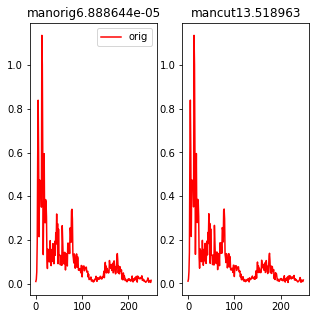

(257, 889) vs (257, 432) in sr 16000


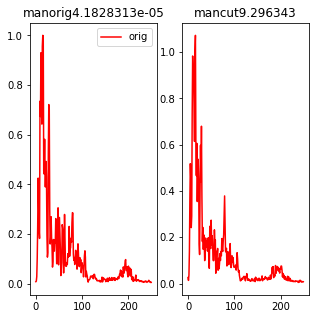

(257, 822) vs (257, 98) in sr 16000


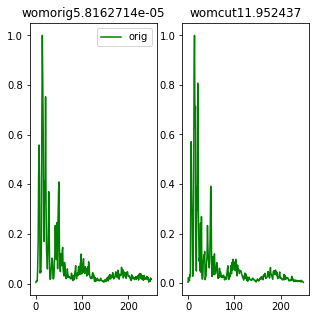

(257, 390) vs (257, 107) in sr 16000


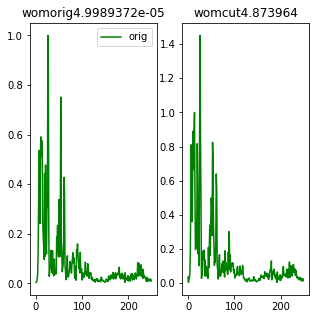

(257, 827) vs (257, 116) in sr 16000


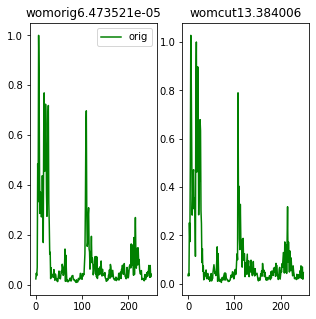

(257, 801) vs (257, 444) in sr 16000


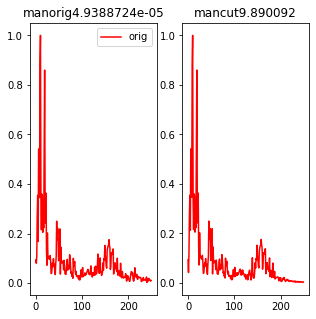

(257, 902) vs (257, 93) in sr 16000


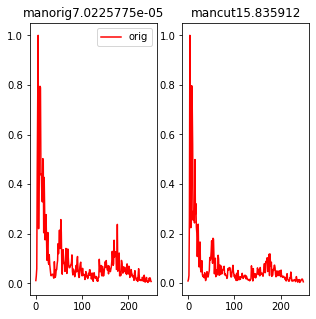

(257, 926) vs (257, 138) in sr 16000


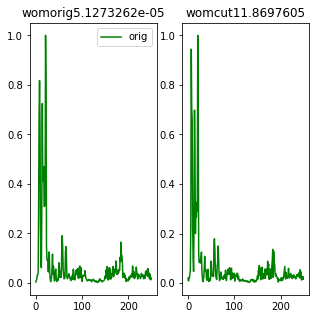

(257, 747) vs (257, 348) in sr 16000


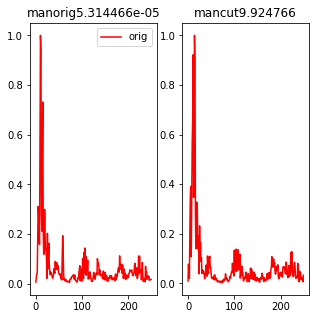

(257, 433) vs (257, 65) in sr 16000


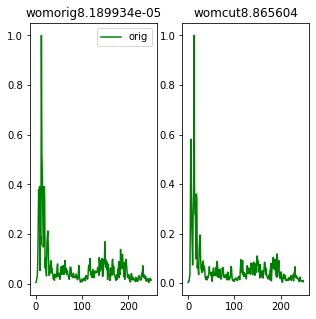

(257, 883) vs (257, 423) in sr 16000


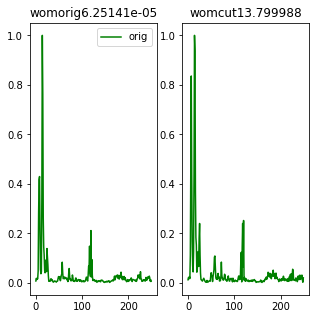

(257, 491) vs (257, 185) in sr 16000


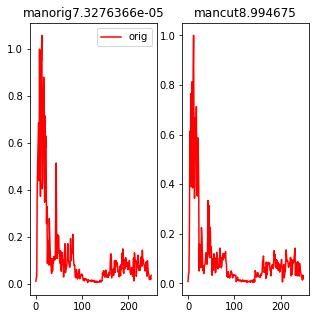

(257, 395) vs (257, 104) in sr 16000


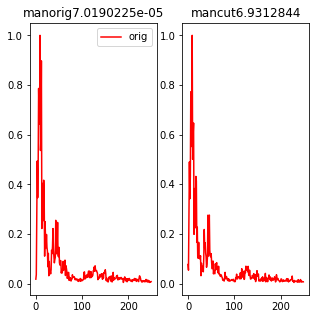

(257, 438) vs (257, 72) in sr 16000


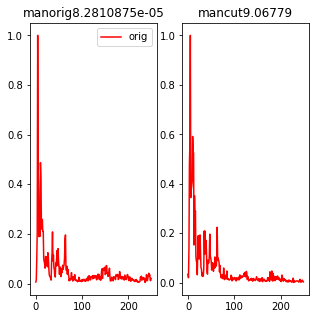

(257, 883) vs (257, 92) in sr 16000


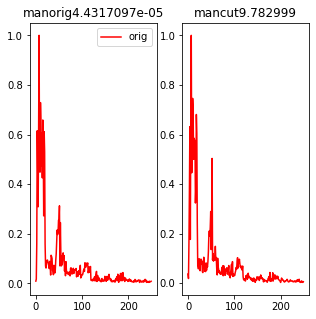

(257, 393) vs (257, 89) in sr 16000


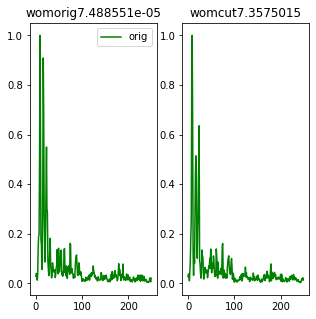

(257, 417) vs (257, 92) in sr 16000


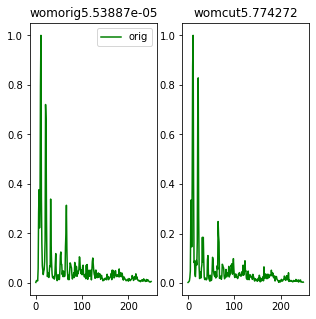

(257, 921) vs (257, 77) in sr 16000


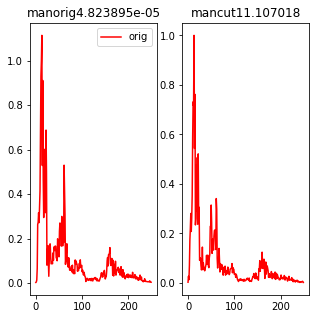

(257, 505) vs (257, 141) in sr 16000


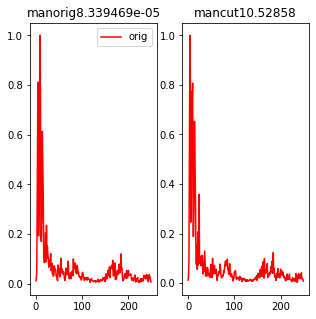

(257, 897) vs (257, 107) in sr 16000


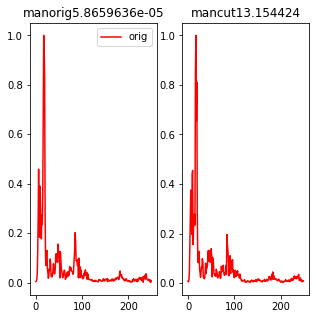

(257, 582) vs (257, 79) in sr 16000


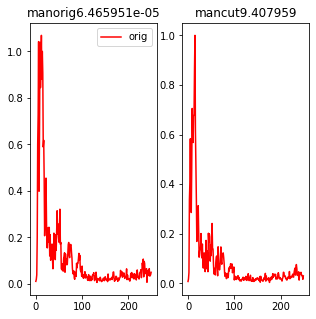

(257, 379) vs (257, 56) in sr 16000


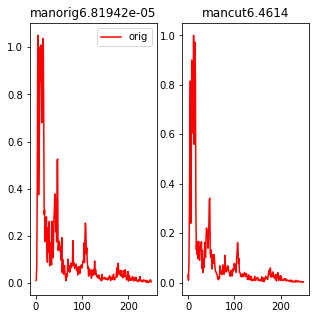

(257, 425) vs (257, 66) in sr 16000


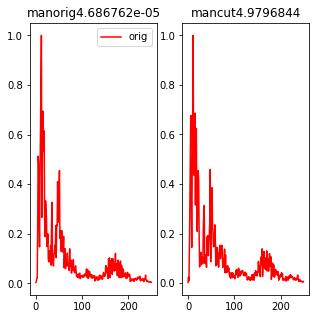

(257, 742) vs (257, 65) in sr 16000


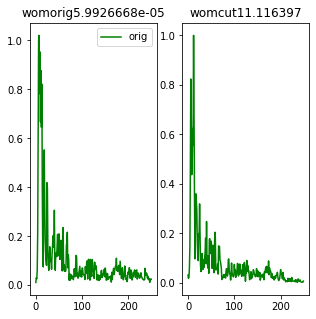

(257, 897) vs (257, 96) in sr 16000


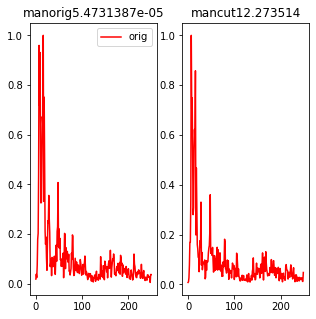

(257, 777) vs (257, 694) in sr 16000


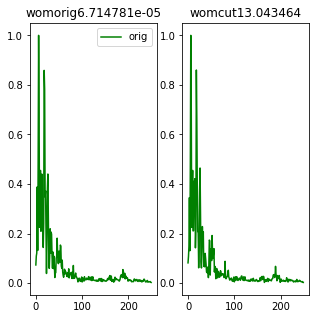

(257, 745) vs (257, 69) in sr 16000


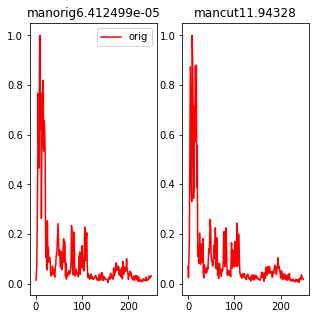

(257, 454) vs (257, 67) in sr 16000


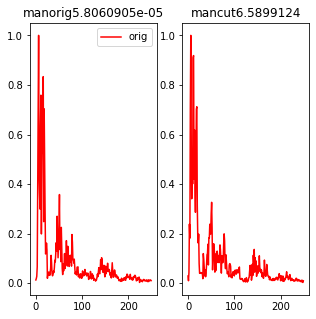

FileNotFoundError: [Errno 2] No such file or directory: '/Users/johnlennon/Downloads/Yandex/train/fa9c8c6eb7cbdcae09a2431add4e1cd9.wav'

In [251]:
import librosa
import soundfile as sf
from scipy.io.wavfile import read as read_wav
import plotly.express as px

# Load the audio file
train_path = '/Users/johnlennon/Downloads/Yandex/train/'
converted_path = '/Users/johnlennon/Downloads/Yandex/converted/'
n_fft = 512
# bitrate = 16000
for i in range(100):
    
    file_name = df['relative_path'][i]
    file_path = train_path + df['relative_path'][i]
    sr, data=read_wav(file_path) # reads sample bitrate
    sex = ['man' if df['classID'][i]==0 else 'wom']
    sex_str = sex[0]
    samples, sample_rate = librosa.load(file_path, sr=sr)
    new_sample = all_cuts(samples)
    sf.write(converted_path+sex[0]+'_'+file_name, new_sample, sampling_rate)
#     print(f'file {file_name.split("/")[-1]} compressed in {len(samples)/len(new_sample)} times')
    sgram = librosa.stft(samples, n_fft=n_fft)
    sgram_conv = librosa.stft(new_sample, n_fft=n_fft)
    print(f'{sgram.shape} vs {sgram_conv.shape} in sr {sample_rate}')
    
    
    
    
    
    freq_array = [abs(elem.max()/sgram.max()) for elem in sgram]
    freq_array_conv = [abs(elem.max()/sgram_conv.max()) for elem in sgram_conv]
    
    
    
    
    
    brd = 250
    color = {'man':'r','wom':'g'}
    f, ax = plt.subplots(1, 2, figsize=(5, 5))
    ax[0].plot([i for i in range(len(sgram[0:brd]))], freq_array[0:brd] , c=color[sex_str]) # plotting by columns
    ax[0].set_title(sex_str+'orig'+ str(abs(sgram[0:brd].mean())))
    ax[0].legend(['orig', 'cut'])
    ax[1].plot([i for i in range(len(sgram_conv[0:brd]))],freq_array_conv[0:brd], c=color[sex_str]) # plotting by columns
    ax[1].set_title(sex_str+'cut'+ str(abs(sgram[0:brd].sum())))
    plt.show()



#     plt.hist(freq_array[0:5000], bins=100)
#     plt.show()

In [296]:
dfx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.374630,0.488824,0.552827,0.505876,0.597716,0.598444,0.613773,0.585615,0.588998,0.572977,0.581635,0.571176,0.583474,0.530676,0.576966,0.556015,0.566347,0.578091,0.515981,0.557994
1,0.372153,0.478966,0.481328,0.429084,0.577226,0.602651,0.595673,0.607170,0.580093,0.519604,0.611664,0.556446,0.588251,0.507640,0.582315,0.456909,0.581760,0.532224,0.572959,0.537887
2,0.346394,0.481551,0.497314,0.424104,0.512559,0.594780,0.590367,0.560239,0.550535,0.556433,0.576605,0.521719,0.504917,0.527287,0.541375,0.479414,0.543389,0.524156,0.456034,0.511146
3,0.340423,0.437253,0.548414,0.432874,0.553549,0.575335,0.616059,0.617086,0.607575,0.393413,0.627822,0.399146,0.575683,0.481550,0.576038,0.572637,0.511900,0.592299,0.594959,0.500351
4,0.348268,0.423919,0.606720,0.490379,0.558995,0.613902,0.636875,0.593676,0.537185,0.528317,0.594697,0.445672,0.607122,0.516711,0.502649,0.555649,0.517224,0.547386,0.570053,0.587554
5,0.363907,0.485601,0.562112,0.407873,0.473850,0.497214,0.561854,0.558973,0.572878,0.508165,0.573678,0.549878,0.530823,0.486551,0.583438,0.464930,0.502874,0.505726,0.511778,0.502212
6,0.301753,0.380544,0.599243,0.408322,0.565597,0.596707,0.622094,0.635857,0.635264,0.513591,0.612356,0.503794,0.633928,0.535631,0.586336,0.599662,0.454244,0.635846,0.460755,0.519692
7,0.393136,0.480490,0.507910,0.532409,0.532673,0.575691,0.569693,0.550211,0.599315,0.572373,0.565043,0.540246,0.572813,0.524997,0.527419,0.560535,0.587329,0.473990,0.551056,0.537524
8,0.318648,0.474533,0.561041,0.391925,0.529153,0.585704,0.588379,0.586559,0.570740,0.536336,0.498607,0.506218,0.515778,0.544689,0.509069,0.529171,0.517678,0.553730,0.440031,0.388402
9,0.359916,0.472651,0.566136,0.516613,0.565178,0.588687,0.609895,0.613207,0.604758,0.537207,0.587989,0.440457,0.568099,0.562895,0.417897,0.593735,0.546094,0.536805,0.531787,0.511620


In [274]:
t = np.array([[2,2,2], [1,1,1]])
t.mean()

1.5

MFCC is of type <class 'numpy.ndarray'> with shape (20, 83)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_9588/341589544.py:13: FutureWarning: Pass y=[0.         0.         0.         ... 0.00183105 0.00186157 0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


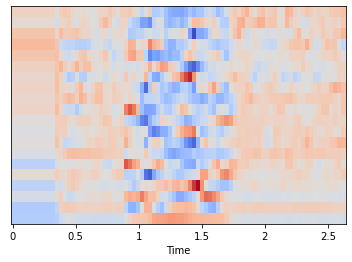

In [135]:
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file0, sr=None)
sgram = librosa.stft(samples)

# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)





# try mfcc and downgrade number of hiperparametres
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')



MFCC is of type <class 'numpy.ndarray'> with shape (20, 169)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_9588/2779304993.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00067139 0.0007019  0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


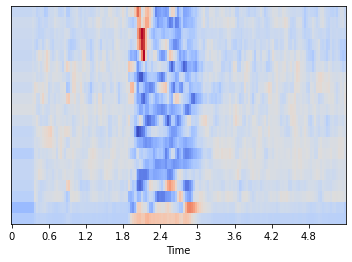

In [136]:
samples, sample_rate = librosa.load(train_file1, sr=None)

# try mfcc and downgrade number of hiperparametres
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

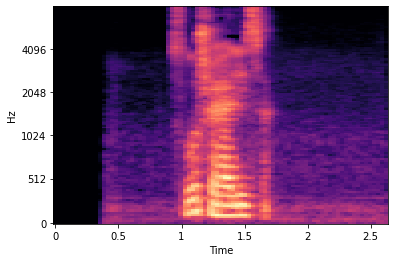

In [138]:
# for man
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file0, sr=None)
sgram = librosa.stft(samples)

# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

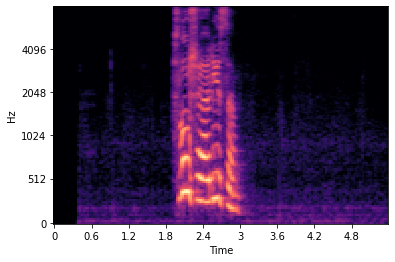

In [139]:
# for woman
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file1, sr=None)
sgram = librosa.stft(samples)

# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

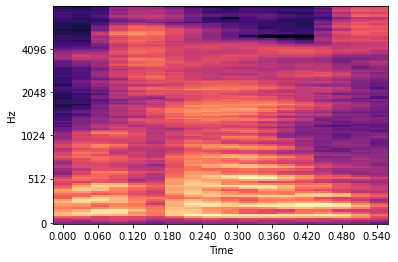

In [145]:
# for man cuted
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file0, sr=None)
samples_cut = all_cuts(samples)
sgram = librosa.stft(samples_cut)

# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram_man = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram_man, sr=sample_rate, x_axis='time', y_axis='mel')

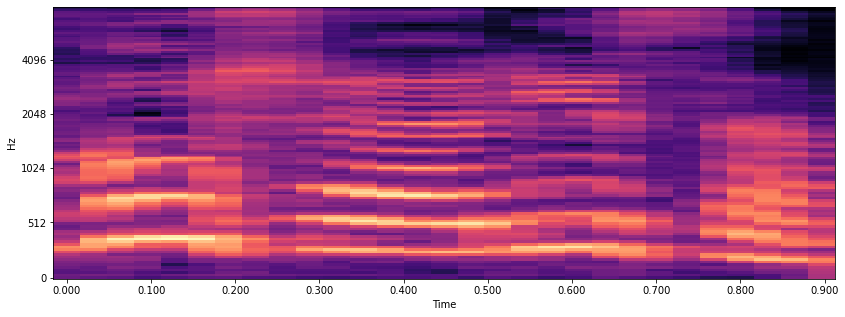

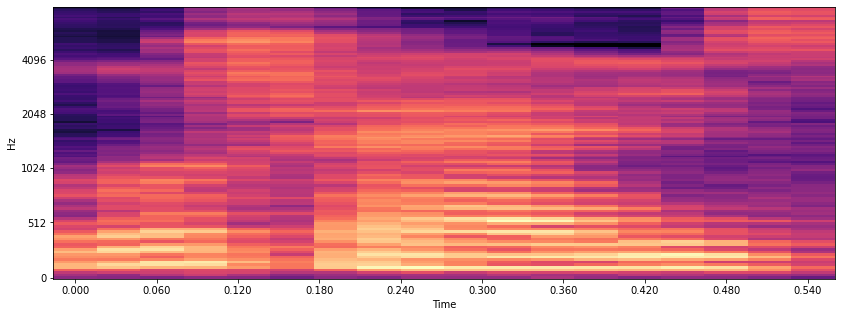

In [146]:
# for woman cuted
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file1, sr=None)
samples_cut = all_cuts(samples)
sgram = librosa.stft(samples_cut)


# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_sgram_man, sr=sample_rate, x_axis='time', y_axis='mel')



In [143]:
mel_sgram.shape

(128, 29)

In [175]:
woman_array = [elem.mean()/mel_sgram.mean() for elem in mel_sgram]

In [176]:
len(std_array)

128

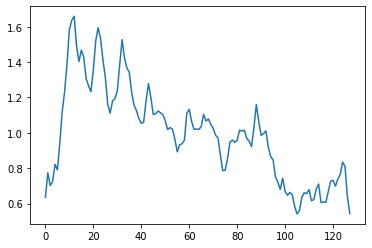

In [178]:

plt.plot(woman_array) # plotting by columns
plt.show()

In [173]:
man_array = [elem.mean()/mel_sgram_man.mean() for elem in mel_sgram_man]

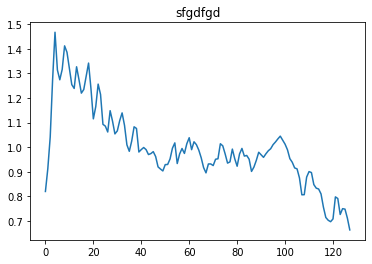

In [181]:
plt.plot(man_array) # plotting by columns
plt.title('sfgdfgd')
plt.show()

In [172]:
mel_sgram_man.mean()

60.737732

# Neural

In [8]:
## mfcc
from sklearn.preprocessing import MinMaxScaler
# prepare X
X = []
y = []
import librosa
import soundfile as sf
from scipy.io.wavfile import read as read_wav
import plotly.express as px

# Load the audio file
train_path = '/Users/johnlennon/Downloads/Yandex/train/'
converted_path = '/Users/johnlennon/Downloads/Yandex/converted/'
n_fft = 512
# bitrate = 16000
# call MinMaxScaler object
min_max_scaler = MinMaxScaler()

for i in range(1000):
    
    file_name = df['relative_path'][i]
    file_path = train_path + df['relative_path'][i]
    sr, data=read_wav(file_path) # reads sample bitrate
    sex = ['man' if df['classID'][i]==0 else 'wom']
    sex_str = sex[0]
    samples, sample_rate = librosa.load(file_path, sr=sr)
    sgram = librosa.stft(samples, n_fft=n_fft)
    # Center MFCC coefficient dimensions to the mean and unit variance
    mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    mfcc_scal = min_max_scaler.fit_transform(mfcc)
    mfcc_array = [abs(elem.mean()) for elem in mfcc_scal]
    
    X.append(mfcc_array)
    y.append(df['classID'][i])
    
#     plt.figure()
#     plt.title(sex_str+'orig')
#     librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
#     plt.colorbar()
    

     
#     brd = 250
#     color = {'man':'r','wom':'g'}
#     f, ax = plt.subplots(1, 2, figsize=(15, 5))
#     ax[0].plot([i for i in range(len(sgram[0:brd]))], freq_array[0:brd] , c=color[sex_str]) # plotting by columns
#     ax[0].set_title(sex_str+'orig'+ str(abs(sgram[0:brd].mean())))
#     ax[0].legend(['orig', 'cut'])
#     ax[1].plot([i for i in range(len(mfcc_array))],mfcc_array, c=color[sex_str]) # plotting by columns
#     ax[1].set_title(sex_str+'orig')
#     plt.show()



#     plt.hist(freq_array[0:5000], bins=100)
#     plt.show()

/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_26811/1122485784.py:29: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00036621 -0.00021362
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_26811/1122

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_26811/1122485784.py:29: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027466 0.00012207 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-package

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_26811/1122485784.py:29: FutureWarning: Pass y=[0.         0.         0.         ... 0.00091553 0.00057983 0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-package

FileNotFoundError: [Errno 2] No such file or directory: '/Users/johnlennon/Downloads/Yandex/train/fa9c8c6eb7cbdcae09a2431add4e1cd9.wav'

In [1]:
dfx = pd.DataFrame(X, columns = ['f'+str(i) for i in range(1, 21)])

NameError: name 'pd' is not defined

In [9]:
dfx.shape

NameError: name 'dfx' is not defined

In [306]:
dfx.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.374630,0.488824,0.552827,0.505876,0.597716,0.598444,0.613773,0.585615,0.588998,0.572977,0.581635,0.571176,0.583474,0.530676,0.576966,0.556015,0.566347,0.578091,0.515981,0.557994
1,0.372153,0.478966,0.481328,0.429084,0.577226,0.602651,0.595673,0.607170,0.580093,0.519604,0.611664,0.556446,0.588251,0.507640,0.582315,0.456909,0.581760,0.532224,0.572959,0.537887
2,0.346394,0.481551,0.497314,0.424104,0.512559,0.594780,0.590367,0.560239,0.550535,0.556433,0.576605,0.521719,0.504917,0.527287,0.541375,0.479414,0.543389,0.524156,0.456034,0.511146
3,0.340423,0.437253,0.548414,0.432874,0.553549,0.575335,0.616059,0.617086,0.607575,0.393413,0.627822,0.399146,0.575683,0.481550,0.576038,0.572637,0.511900,0.592299,0.594959,0.500351
4,0.348268,0.423919,0.606720,0.490379,0.558995,0.613902,0.636875,0.593676,0.537185,0.528317,0.594697,0.445672,0.607122,0.516711,0.502649,0.555649,0.517224,0.547386,0.570053,0.587554


In [ ]:
import tensorflow as tf